In [3]:
# Importing all necessary Libraries

import numpy as np # numpy used for mathematical operation on array
import pandas as pd  # pandas used for data manipulation on dataframe
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings( "ignore" )

In [4]:
#reading the data set named as train

df=pd.read_csv("healthcare-dataset-stroke-data.csv",header=0)

In [5]:
df.sample()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4677,57043,Female,66.0,0,0,Yes,Self-employed,Urban,102.73,35.0,formerly smoked,0


In [6]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [7]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

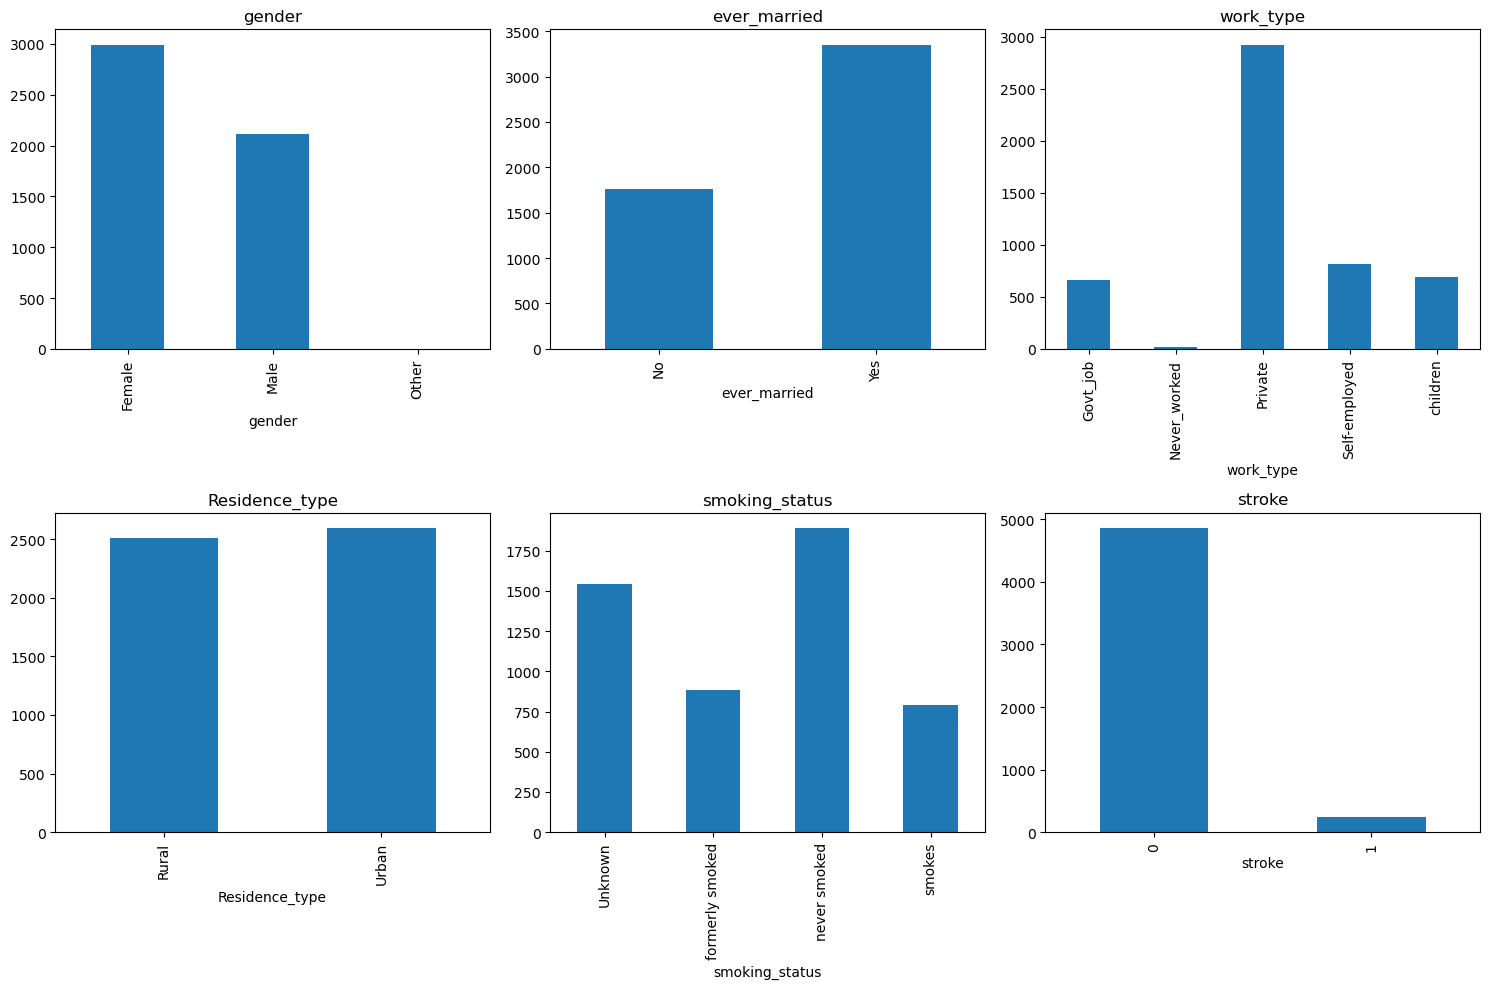

In [8]:
# Select the categorical and numerical features
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status','stroke']

# Generate a cross-tabulation table for the categorical features
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
for i, feature in enumerate(categorical_features):
    ct = pd.crosstab(index=df[feature], columns='count')
    ax = axs[i // 3, i % 3]
    ct.plot(kind='bar', legend=None, ax=ax)  # set the color of the bars to blue
    ax.set_title(feature)
plt.tight_layout()
plt.show()

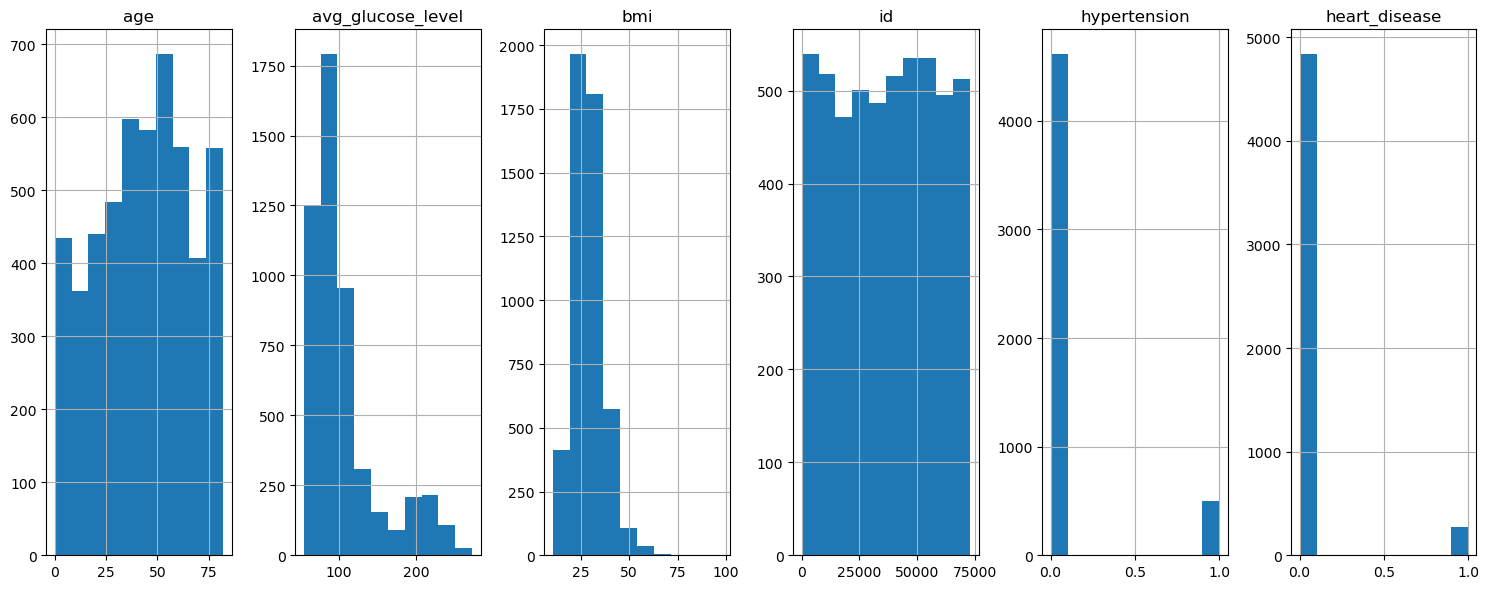

In [9]:
import matplotlib.pyplot as plt

# Select the numerical features
numerical_features = ['age', 'avg_glucose_level', 'bmi','id','hypertension','heart_disease']

# Create a histogram for each numerical feature
fig, axs = plt.subplots(nrows=1,ncols=6,figsize=(15, 6))
for i, feature in enumerate(numerical_features):
    ax = axs[i]
    df[feature].hist(ax=ax)
    ax.set_title(feature)
plt.tight_layout()
plt.show()


In [51]:
df['hypertension'] = df['hypertension'].apply(lambda x: 'Yes' if x == 1 else 'No')
df['heart_disease'] = df['heart_disease'].apply(lambda x: 'Yes' if x == 1 else 'No')


In [53]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension          object
heart_disease         object
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                object
dtype: object

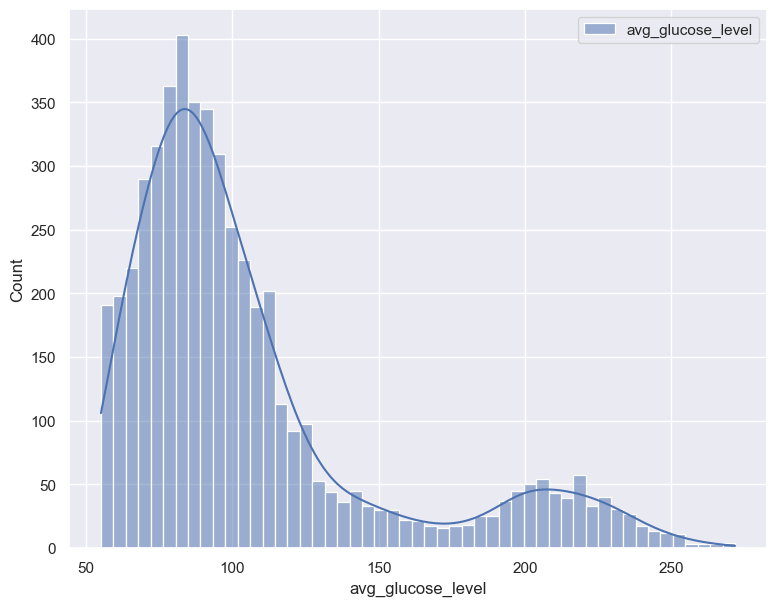

In [54]:
# using the displot(combination of histogram and KDE) to check the distribution of the avg_glucose_level

sns.set_theme(style = 'darkgrid')
fig = plt.figure(figsize = (9,7)) 
sns.histplot(df['avg_glucose_level'],label = "avg_glucose_level", kde = True)
plt.legend()

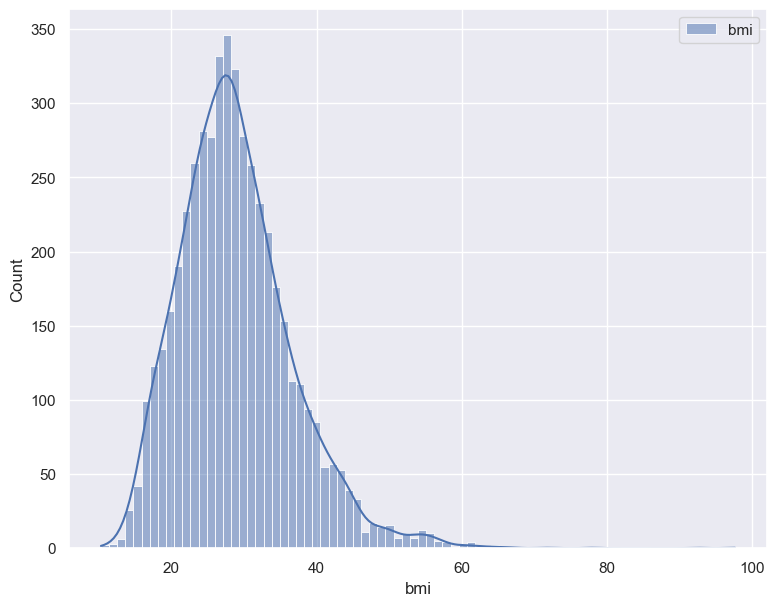

In [55]:
# using the displot to check the distribution of the bmi
sns.set_theme(style = 'darkgrid')
fig = plt.figure(figsize = (9,7)) 
sns.histplot(df['bmi'],label = "bmi", kde = True)
plt.legend()

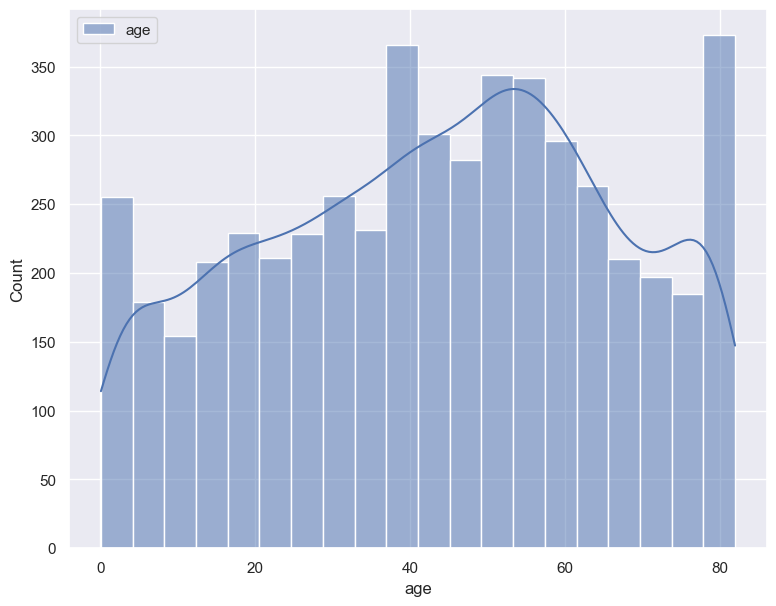

In [56]:
# using the displot to check the distribution of the age
sns.set_theme(style = 'darkgrid')
fig = plt.figure(figsize = (9,7)) 
sns.histplot(df['age'],label = "age", kde = True)
plt.legend()

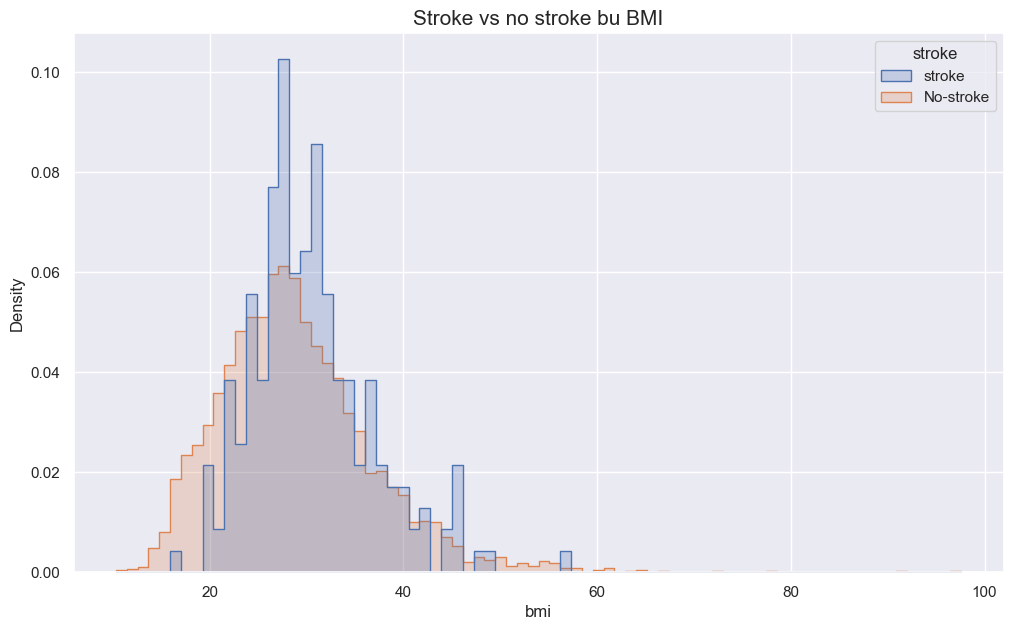

In [57]:
plt.figure(figsize = (12,7))
sns.histplot(
    df, x = 'bmi', hue = "stroke",
    element = "step",
    stat = "density", common_norm = False)
plt.title("Stroke vs no stroke bu BMI", fontsize = 15)
plt.show()

In [58]:
df_all = df.copy()
df_stroke = df[df['stroke']==1]
df_non = df[df['stroke']==0]

In [59]:
def plot_pie(column, title="All"):
    fig,axs = plt.subplots(1,1)
    data = df_all[column].value_counts()
    plt.pie(data,autopct='%1.2f%%', labels = data.index)
    plt.title(title)
    plt.show()

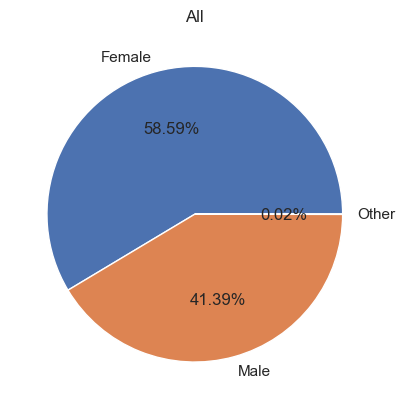

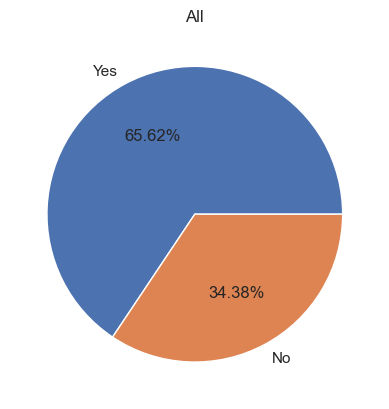

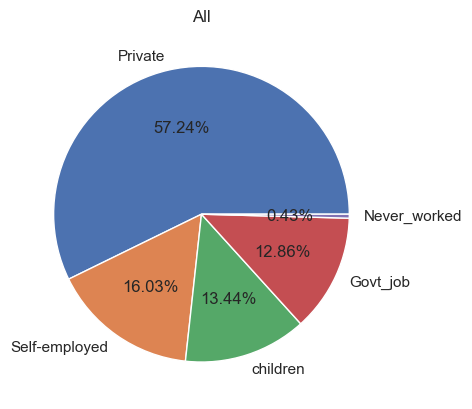

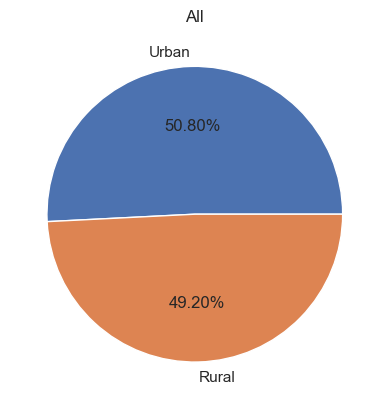

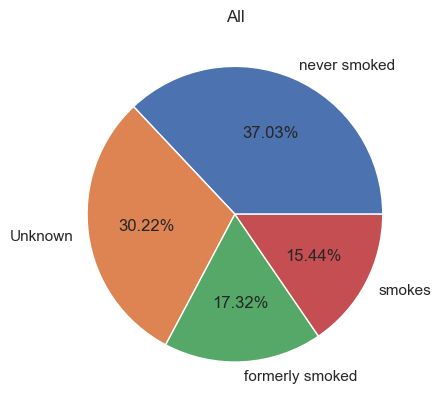

In [60]:
plot_pie('gender')
plot_pie('ever_married')
plot_pie('work_type')
plot_pie('Residence_type')
plot_pie('smoking_status')



<AxesSubplot:>

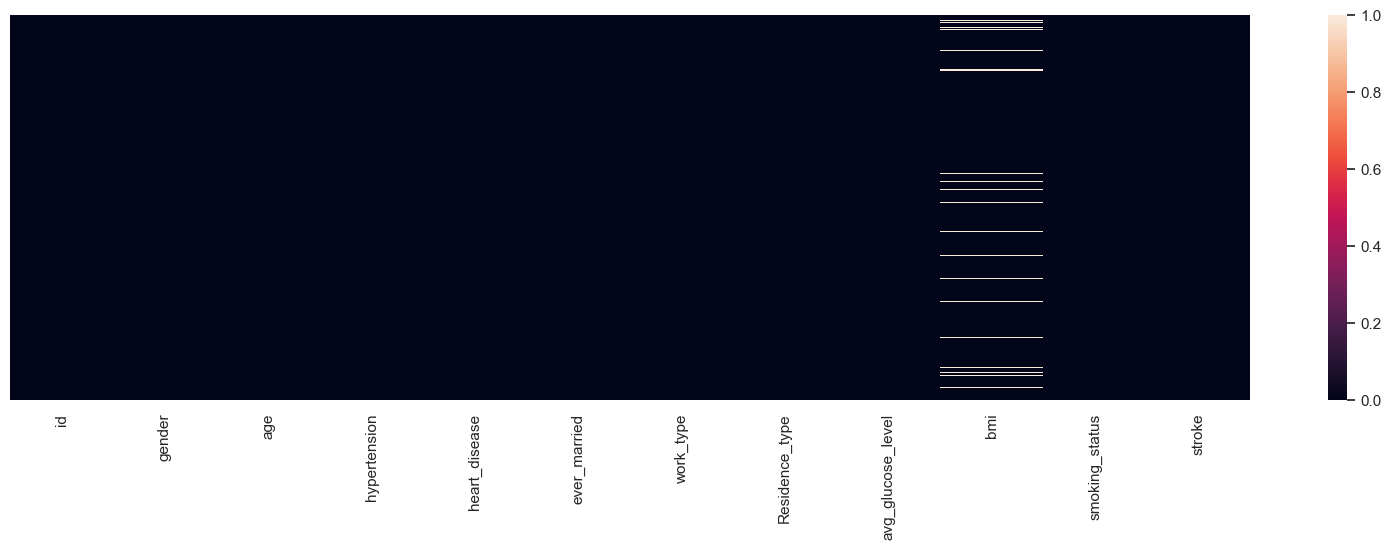

In [61]:
# Plotting a heat map to check null values in each column
plt.figure(figsize=(20,5))
sns.heatmap(df.isnull(),yticklabels= False)

In [62]:
# Excluding/separating a categorical column from numerical columns

df1=df.select_dtypes(exclude=['object'])

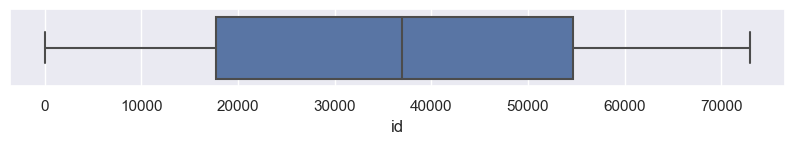

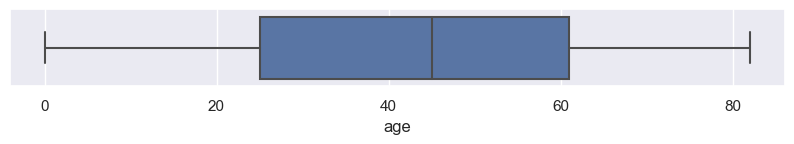

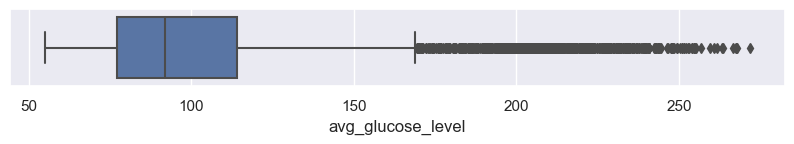

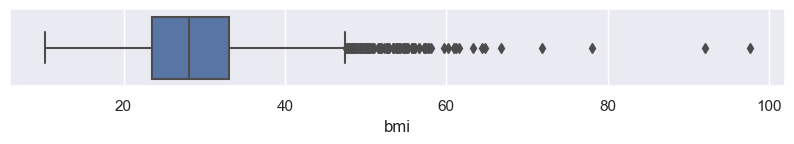

In [63]:
# Applying a box-plot to check the outliers
for column in df1:
    plt.figure(figsize=(10,1))
    sns.boxplot(data=df1,x=column)

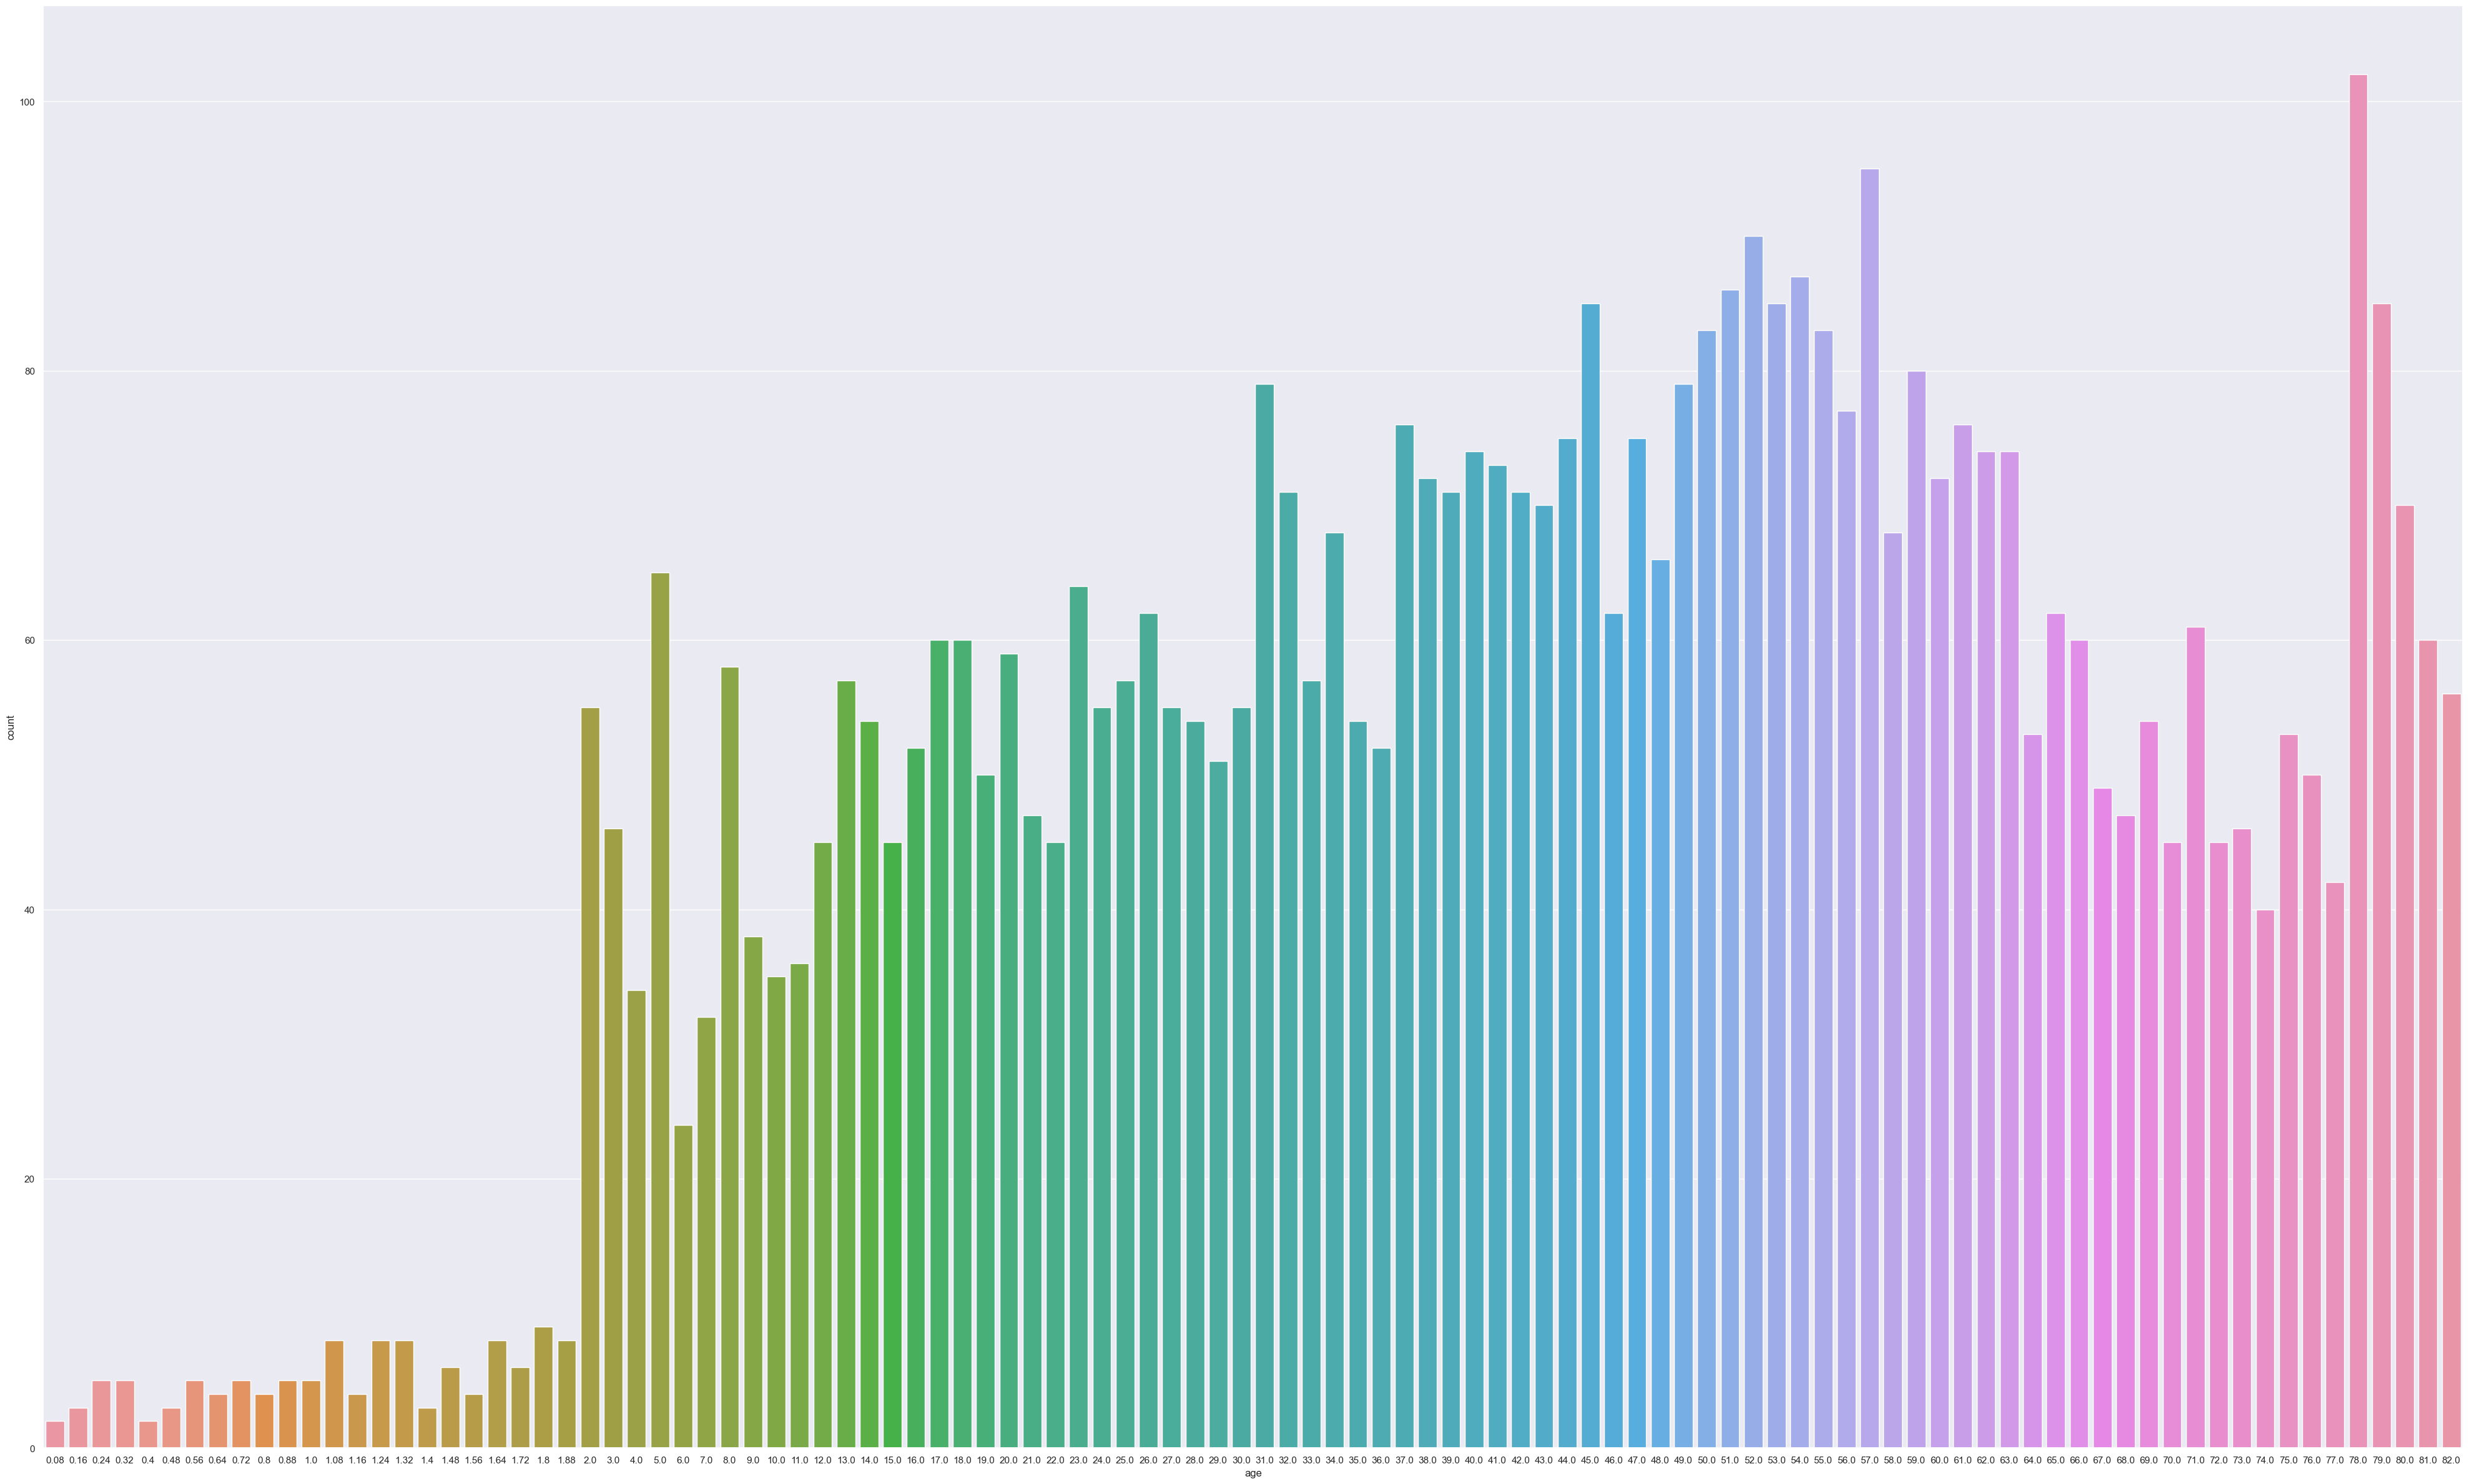

In [64]:

# to show count of values in target column using countplot
plt.figure(figsize=(50,30))
sns.countplot(x='age',data=df)
plt.show()


In [65]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [66]:
print(df['stroke'])

0          stroke
1          stroke
2          stroke
3          stroke
4          stroke
          ...    
5105    No-stroke
5106    No-stroke
5107    No-stroke
5108    No-stroke
5109    No-stroke
Name: stroke, Length: 5110, dtype: object


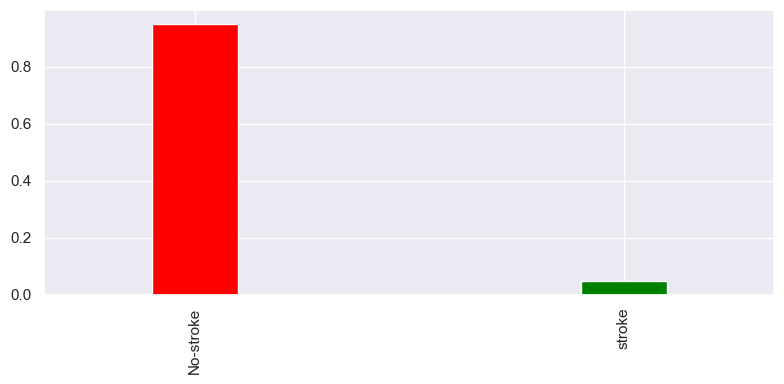

In [67]:
fig, axes =plt.subplots(figsize=(8,4))
df['stroke'].value_counts(normalize=True).plot.bar(width=0.2, color=('red','green'))

plt.tight_layout()
plt.show()

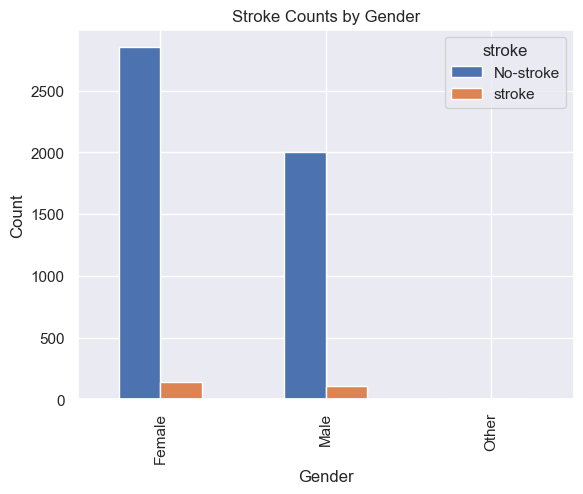

In [69]:
import matplotlib.pyplot as plt

# Group the data by gender and stroke
gender_stroke_counts = df.groupby(['gender', 'stroke']).size().unstack()

# Create a bar chart
gender_stroke_counts.plot(kind='bar', stacked=False)

# Set the chart title and axis labels
plt.title('Stroke Counts by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Show the chart
plt.show()


In [70]:
df.groupby(['gender'])['stroke'].value_counts()

gender  stroke   
Female  No-stroke    2853
        stroke        141
Male    No-stroke    2007
        stroke        108
Other   No-stroke       1
Name: stroke, dtype: int64

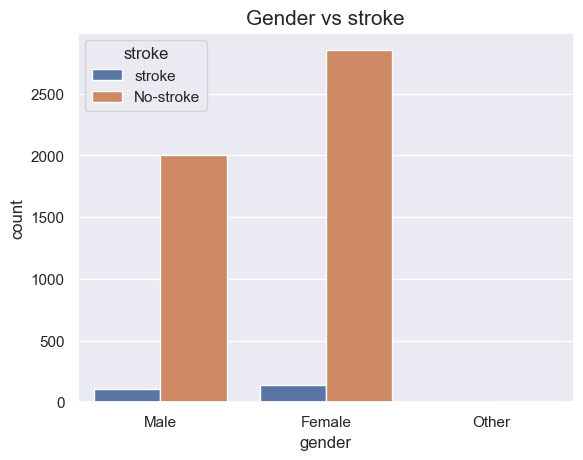

In [71]:
sns.countplot(x=df['gender'],hue=df["stroke"])

plt.title('Gender vs stroke', fontsize=15)
plt.show()

In [72]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [73]:
df.groupby(['gender'])['smoking_status'].value_counts()

gender  smoking_status 
Female  never smoked       1229
        Unknown             836
        formerly smoked     477
        smokes              452
Male    Unknown             708
        never smoked        663
        formerly smoked     407
        smokes              337
Other   formerly smoked       1
Name: smoking_status, dtype: int64

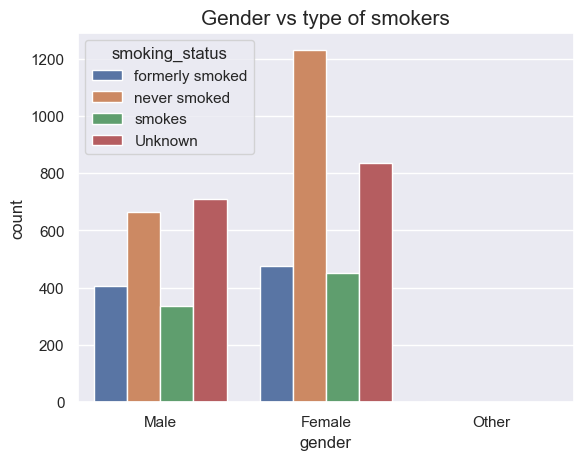

In [74]:
sns.countplot(x=df['gender'],hue=df["smoking_status"])

plt.title('Gender vs type of smokers', fontsize=15)
plt.show()

In [75]:
df.groupby(['gender'])['Residence_type'].value_counts()

gender  Residence_type
Female  Urban             1529
        Rural             1465
Male    Urban             1067
        Rural             1048
Other   Rural                1
Name: Residence_type, dtype: int64

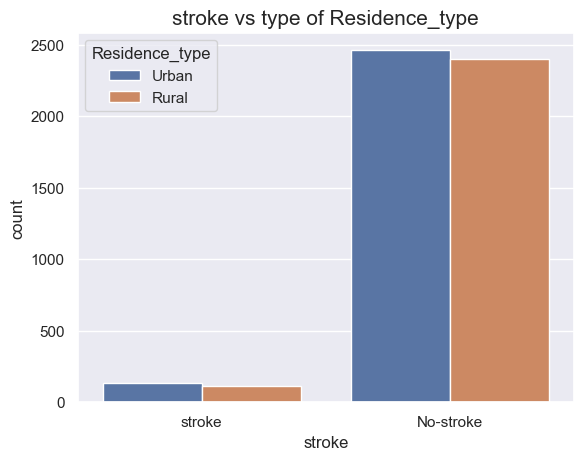

In [76]:
sns.countplot(x=df['stroke'],hue=df["Residence_type"])

plt.title('stroke vs type of Residence_type', fontsize=15)
plt.show()

In [78]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension          object
heart_disease         object
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                object
dtype: object

In [81]:
# coverting the categorical features into numerical features using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

df = pd.DataFrame(df)

# Initialize the OneHotEncoder object and specify columns to be encoded
ohe = OneHotEncoder(sparse=False, categories='auto')
columns_to_encode = ['gender','hypertension','heart_disease','Residence_type','ever_married','work_type','Residence_type','smoking_status','stroke']

# Fit and transform the OneHotEncoder on the selected columns of the dataframe
encoded_cols = ohe.fit_transform(df[columns_to_encode])

# Create a dataframe from the encoded columns with the original column names
encoded_df = pd.DataFrame(encoded_cols, columns=ohe.get_feature_names(columns_to_encode))

# Combine the original dataframe with the encoded dataframe
df_encoded = pd.concat([df.drop(columns_to_encode, axis=1), encoded_df], axis=1)

print(df_encoded.head())


      id   age  avg_glucose_level   bmi  gender_Female  gender_Male  \
0   9046  67.0             228.69  36.6            0.0          1.0   
1  51676  61.0             202.21   NaN            1.0          0.0   
2  31112  80.0             105.92  32.5            0.0          1.0   
3  60182  49.0             171.23  34.4            1.0          0.0   
4   1665  79.0             174.12  24.0            1.0          0.0   

   gender_Other  hypertension_No  hypertension_Yes  heart_disease_No  ...  \
0           0.0              1.0               0.0               0.0  ...   
1           0.0              1.0               0.0               1.0  ...   
2           0.0              1.0               0.0               0.0  ...   
3           0.0              1.0               0.0               1.0  ...   
4           0.0              0.0               1.0               1.0  ...   

   work_type_Self-employed  work_type_children  Residence_type_Rural  \
0                      0.0            

In [83]:
# concatinating numerical and categorical columns 
df=pd.concat([df1,df_encoded],axis=1)


<AxesSubplot:>

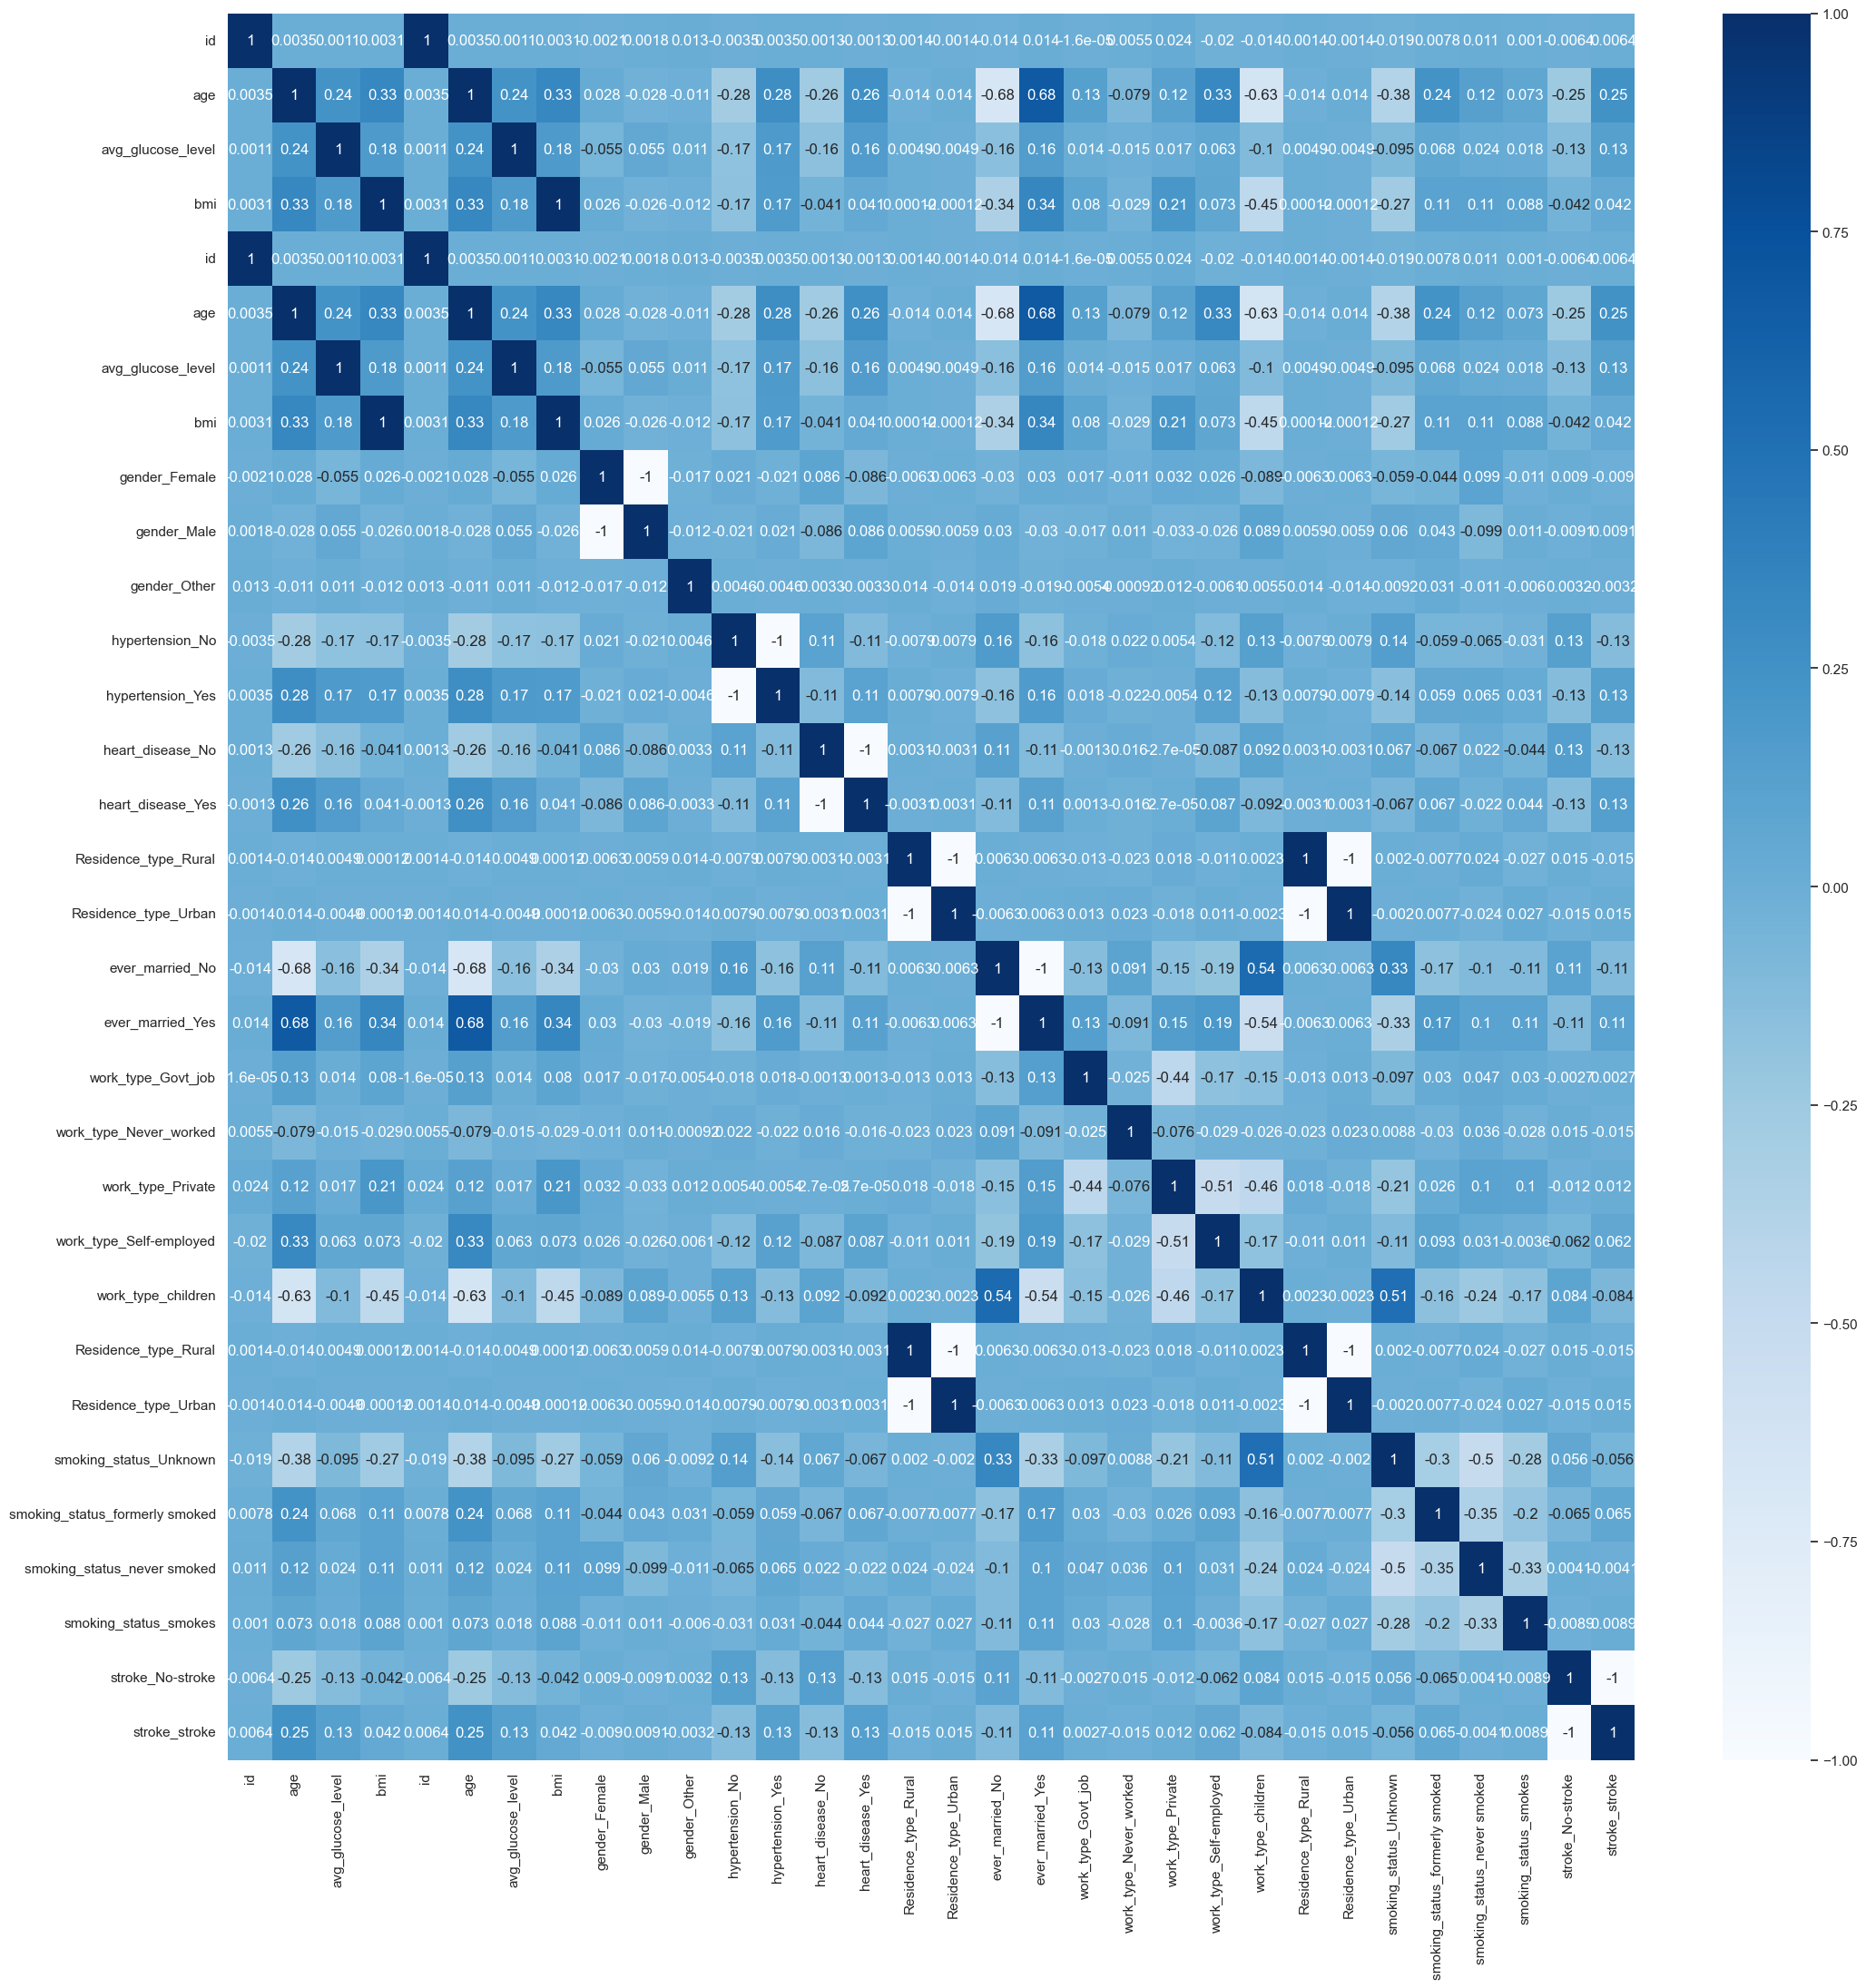

In [87]:
# 2D Correlation heatmap matrix
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')